In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("C:/Users/amans/Downloads/data_clean.csv")
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [2]:
data.rename({'Solar.R': 'Solar'},axis = 1,inplace= True)
data.head()

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [3]:
data.isnull().sum()

Unnamed: 0     0
Ozone         38
Solar          7
Wind           0
Temp C         0
Month          0
Day            0
Year           0
Temp           0
Weather        3
dtype: int64

<Axes: >

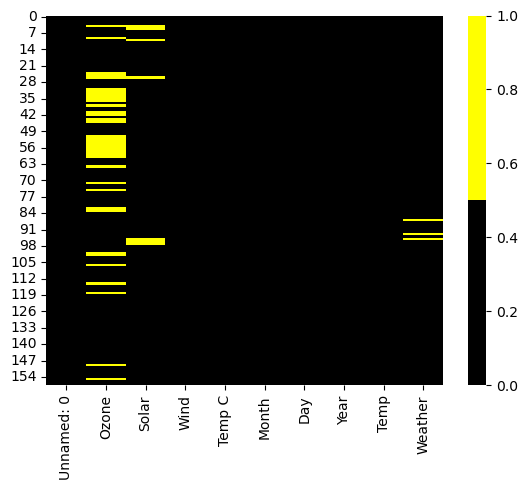

In [4]:
cols = data.columns
colors = ['black' , 'yellow']
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [5]:
median_ozone = data["Ozone"].median()
mean_ozone =data["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  30.5
Mean of Ozone:  41.583333333333336


In [6]:
data['Ozone'] = data['Ozone'].fillna(median_ozone)
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         7
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [7]:
data['Solar'] = data['Solar'].fillna(median_ozone)
data.head()

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,30.5,30.5,14.3,56,5,5,2010,56,S


In [8]:
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         0
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       3
dtype: int64

In [9]:
print(data['Weather'].value_counts())
mode_weather = data['Weather'].mode()[0]
print(mode_weather)

Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [10]:
data["Weather"] =data["Weather"].fillna(mode_weather)
data.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar         0
Wind          0
Temp C        0
Month         0
Day           0
Year          0
Temp          0
Weather       0
dtype: int64

In [11]:
data.reset_index(drop = True)

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,30.5,30.5,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,30.5,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [12]:
data.drop(["Unnamed: 0"],axis = 1)

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,30.5,30.5,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,30.5,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


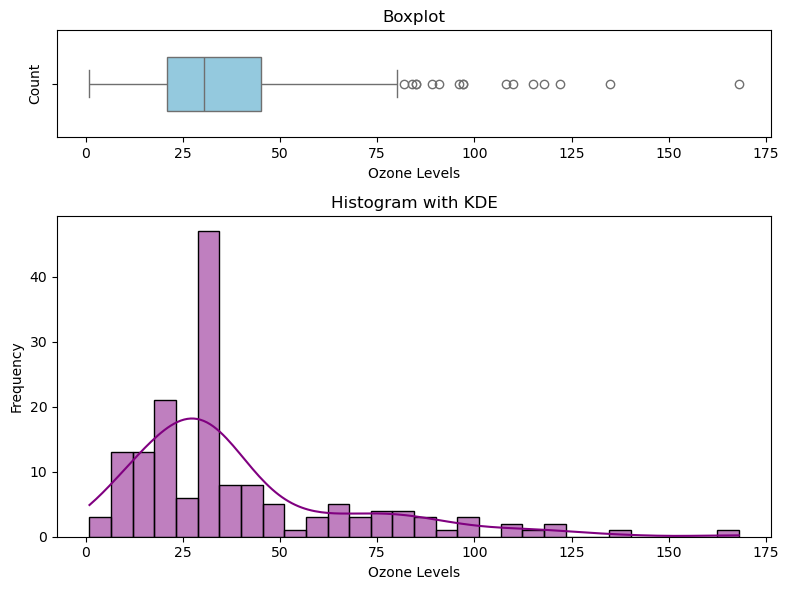

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data["Ozone"], ax =axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
axes[0].set_ylabel("Count")

sns.histplot(data["Ozone"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

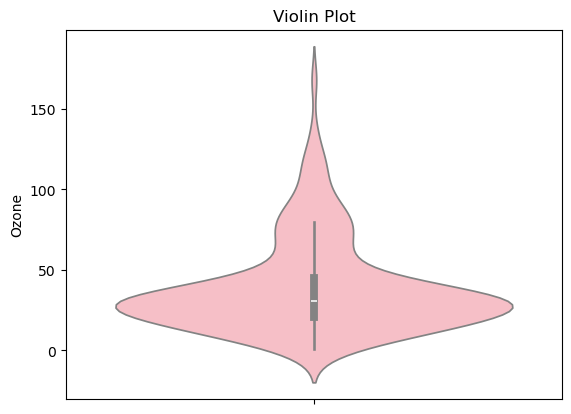

In [14]:
sns.violinplot(data=data['Ozone'],color='lightpink')
plt.title('Violin Plot')
plt.show()

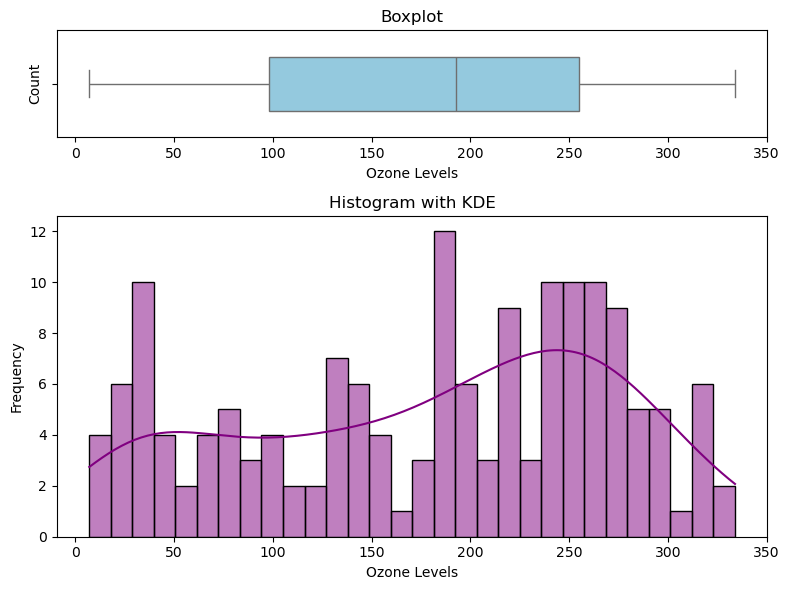

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})

sns.boxplot(data=data["Solar"], ax =axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
axes[0].set_ylabel("Count")

sns.histplot(data["Solar"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ozone Levels")
axes[1].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

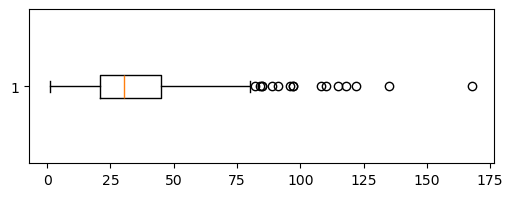

In [16]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

In [17]:
data['Ozone'].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
mu = data['Ozone'].describe()[1]
sigma = data['Ozone'].describe()[2]

for x in data['Ozone']:
    if((x<(mu - 3*sigma)) or (x>(mu + 3*sigma))):
        print(x)

135.0
168.0


Text(0.5, 0, 'Theoretical Quantiles')

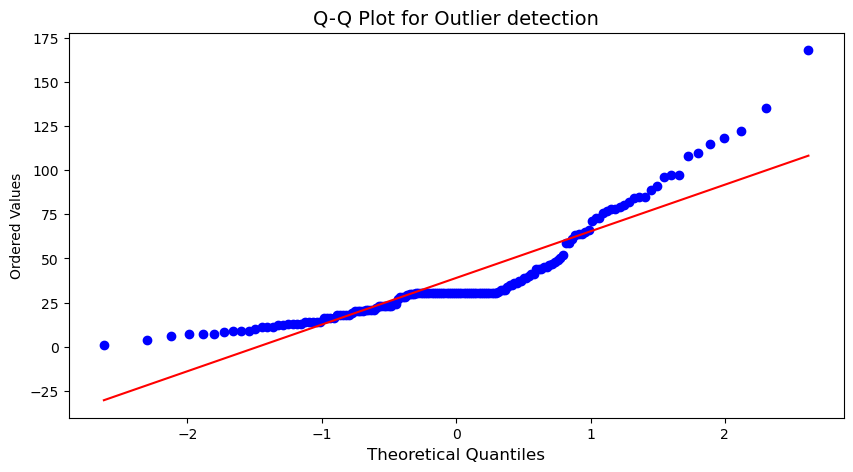

In [20]:
import scipy.stats as stats

plt.figure(figsize=(10,5))
stats.probplot(data['Ozone'],dist = 'norm',plot = plt)
plt.title('Q-Q Plot for Outlier detection',fontsize = 14)
plt.xlabel('Theoretical Quantiles',fontsize = 12)

<Axes: xlabel='Weather', ylabel='Ozone'>

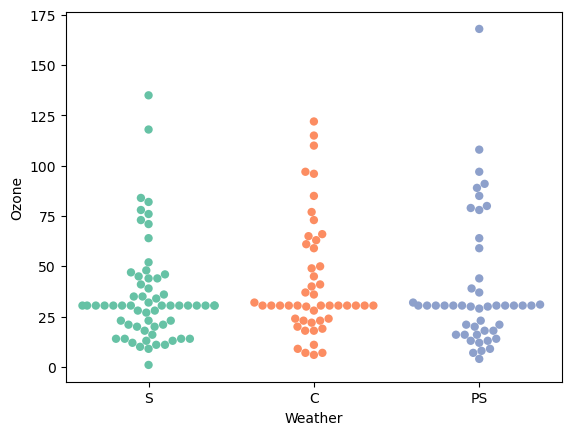

In [21]:
sns.swarmplot(data=data, x = "Weather", y = "Ozone",color="orange",palette="Set2", size =6)

<Axes: xlabel='Ozone', ylabel='Density'>

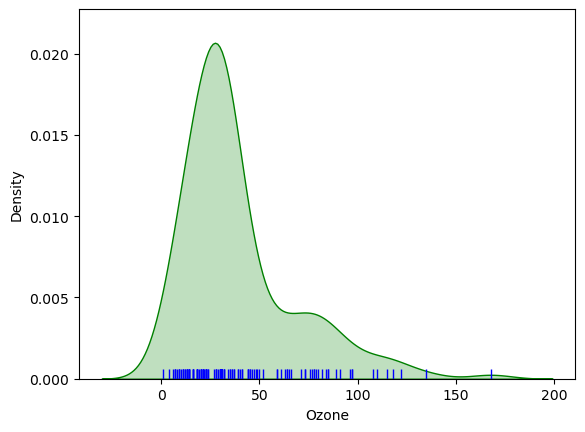

In [22]:
sns.kdeplot(data=data["Ozone"], fill=True, color="green")
sns.rugplot(data=data["Ozone"], color="blue")

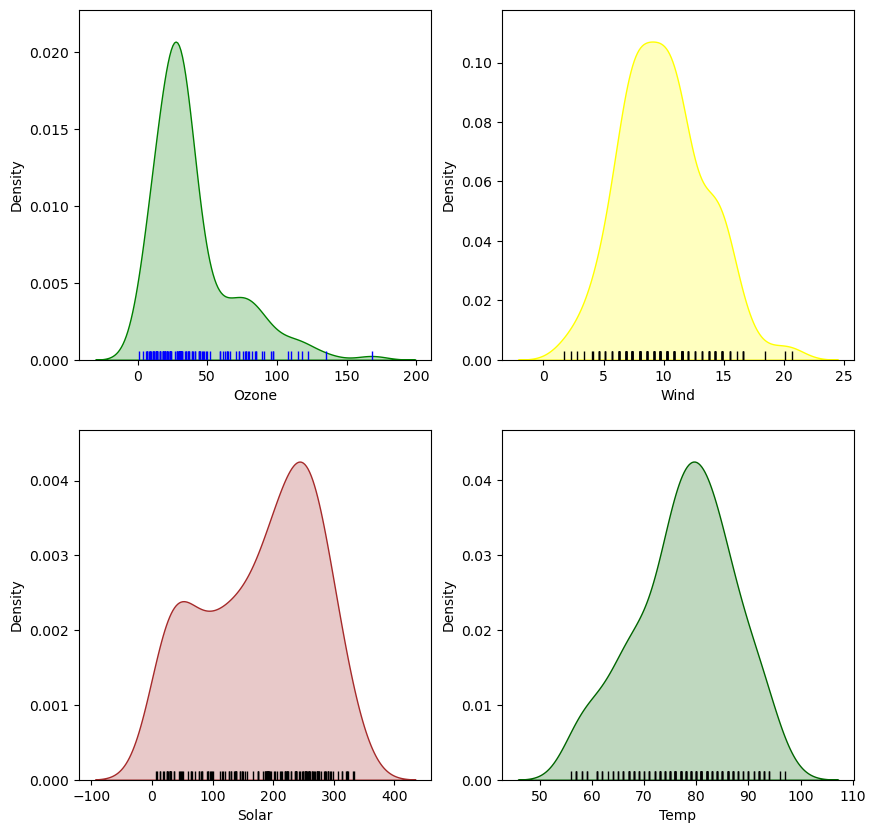

In [23]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
sns.kdeplot(data=data["Ozone"], fill=True, color="green", ax = axes [0] [0])
sns.rugplot(data=data["Ozone"], color="blue", ax = axes [0] [0])
sns.kdeplot(data=data["Wind"], fill=True, color="yellow", ax = axes [0] [1])
sns.rugplot(data=data["Wind"], color="black", ax = axes [0] [1])
sns.kdeplot(data=data["Solar"], fill=True, color="brown", ax = axes [1] [0])
sns.rugplot(data=data["Solar"], color="black", ax = axes [1] [0])
sns.kdeplot(data=data["Temp"], fill=True, color="darkgreen", ax = axes [1] [1])
sns.rugplot(data=data["Temp"], color="black", ax = axes [1] [1])
plt.show()

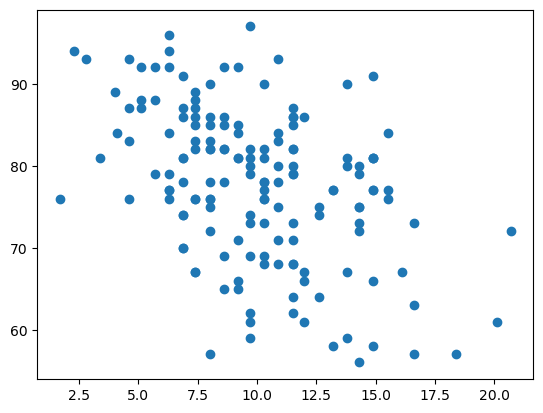

In [24]:
plt.scatter(data["Wind"], data["Temp"])

### Observation

The correlation between wind and temp is observed to be negatively correlated with mild strength



In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       158 non-null    float64
 2   Solar       158 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [26]:
data_numeric = data.iloc[:,[0,1,2,6]]
data_numeric

,Unnamed: 0,Ozone,Solar,Day
0,1,41.0,190.0,1
1,2,36.0,118.0,2
2,3,12.0,149.0,3
3,4,18.0,313.0,4
4,5,30.5,30.5,5
...,...,...,...,...
153,154,41.0,190.0,1
154,155,30.0,193.0,26
155,156,30.5,145.0,27
156,157,14.0,191.0,28


In [27]:
data_numeric.corr()

,Unnamed: 0,Ozone,Solar,Day
Unnamed: 0,1.000000,0.148419,-0.049132,0.216219
Ozone,0.148419,1.000000,0.276848,-0.039298
Solar,-0.049132,0.276848,1.000000,-0.083367
Day,0.216219,-0.039298,-0.083367,1.000000


### Observations

* The highest correlation strength is observed between Ozone and Temperature (0.597087)
* The next higher correlation strength is observed between Ozone and wind (-0.523738)
* The next higher correlation strength is observed between wind and temp (-0.441228)
* The least correlation strength is observed between solar and wind(-0.055874)

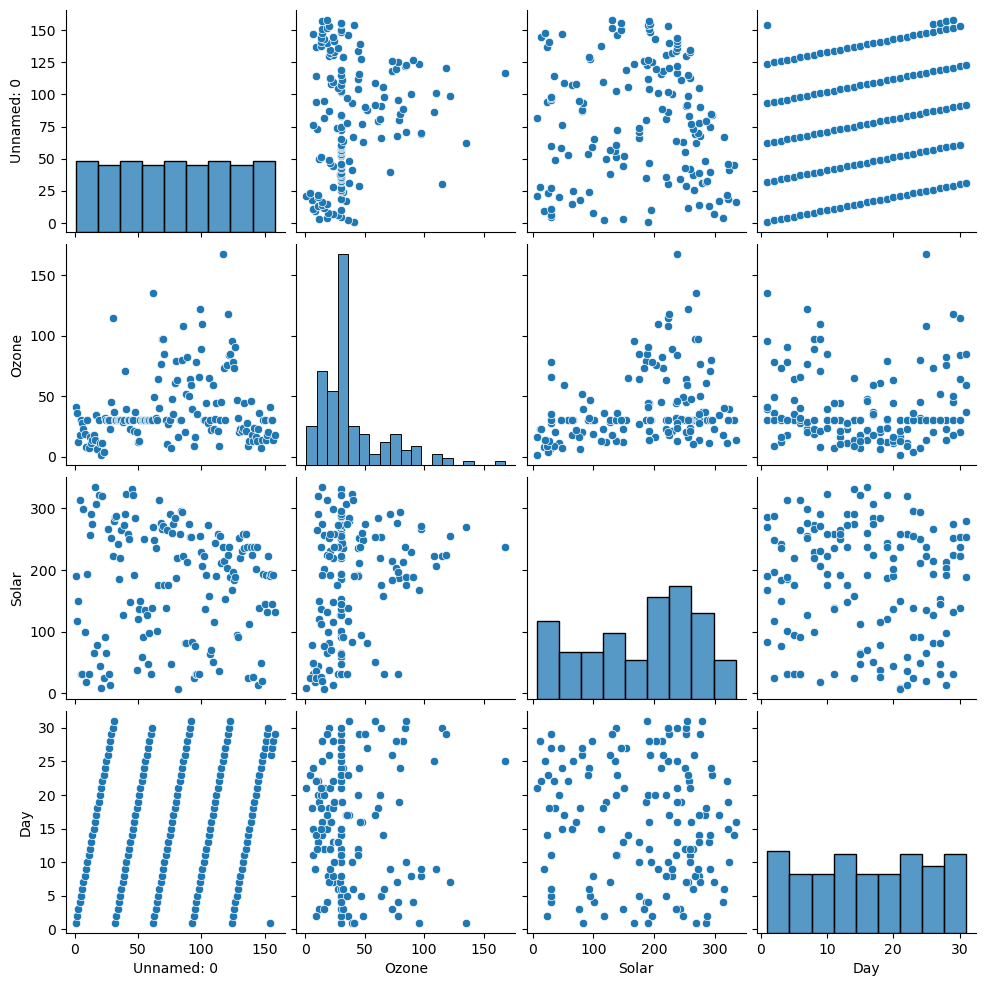

In [28]:
sns.pairplot(data_numeric)

In [29]:
data=pd.get_dummies(data,columns=['Month', 'Weather'])
data

,Unnamed: 0,Ozone,Solar,Wind,Temp C,Day,Year,Temp,Month_5,Month_6,Month_7,Month_8,Month_9,Month_May,Weather_C,Weather_PS,Weather_S
0,1,41.0,190.0,7.4,67,1,2010,67,True,False,False,False,False,False,False,False,True
1,2,36.0,118.0,8.0,72,2,2010,72,True,False,False,False,False,False,True,False,False
2,3,12.0,149.0,12.6,74,3,2010,74,True,False,False,False,False,False,False,True,False
3,4,18.0,313.0,11.5,62,4,2010,62,True,False,False,False,False,False,False,False,True
4,5,30.5,30.5,14.3,56,5,2010,56,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,1,2010,67,True,False,False,False,False,False,True,False,False
154,155,30.0,193.0,6.9,70,26,2010,70,False,False,False,False,True,False,False,True,False
155,156,30.5,145.0,13.2,77,27,2010,77,False,False,False,False,True,False,False,False,True
156,157,14.0,191.0,14.3,75,28,2010,75,False,False,False,False,True,False,False,False,True
